<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Simple-Dataset" data-toc-modified-id="Simple-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simple Dataset</a></span><ul class="toc-item"><li><span><a href="#Create-a-Dataset" data-toc-modified-id="Create-a-Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Create a Dataset</a></span></li><li><span><a href="#Transforms-(Normalize-or-Standardize)" data-toc-modified-id="Transforms-(Normalize-or-Standardize)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Transforms (Normalize or Standardize)</a></span></li><li><span><a href="#Transforms-Compose-(several-transforms-in-series)" data-toc-modified-id="Transforms-Compose-(several-transforms-in-series)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Transforms Compose (several transforms in series)</a></span></li></ul></li><li><span><a href="#Dataset-for-Images" data-toc-modified-id="Dataset-for-Images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset for Images</a></span><ul class="toc-item"><li><span><a href="#Create-customized-dataset" data-toc-modified-id="Create-customized-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create customized dataset</a></span></li><li><span><a href="#Torch-Vision-Transform" data-toc-modified-id="Torch-Vision-Transform-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Torch Vision Transform</a></span></li><li><span><a href="#Torchvision-Dataset" data-toc-modified-id="Torchvision-Dataset-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Torchvision Dataset</a></span></li></ul></li></ul></div>

# Simple Dataset

## Create a Dataset

In [1]:
import torch
from torch.utils.data import Dataset

class my_dataset(Dataset):
    def __init__(self, length=100, transform=None):
        self.x = 2 * torch.ones(length, 2)
        self.y = torch.ones(length, 1)
        self.len = length
        self.transform = transform
        
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample
    
    def __len__(self):
        return self.len

In [2]:
dataset = my_dataset()
print(len(dataset))
print(dataset[0])

for i in range(3):
    print(dataset[i])

100
(tensor([2., 2.]), tensor([1.]))
(tensor([2., 2.]), tensor([1.]))
(tensor([2., 2.]), tensor([1.]))
(tensor([2., 2.]), tensor([1.]))


## Transforms (Normalize or Standardize)

In [3]:
class add_mult(object):
    
    def __init__(self, addx=1, muly=1):
        self.addx = addx
        self.muly = muly
        
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        
        x = x + self.addx
        y = y * self.muly
        
        sample = x, y
        return sample
    

In [4]:
# Way 1

dataset = my_dataset()

a_m = add_mult()
_x, _y = a_m(dataset[0])
print(_x, _y)

tensor([3., 3.]) tensor([1.])


In [5]:
# Way 2
a_m = add_mult()
_dataset = my_dataset(transform=a_m)
print(_dataset[0])

(tensor([3., 3.]), tensor([1.]))



## Transforms Compose (several transforms in series)

In [6]:
from torchvision import transforms

class add_mult(object):
    
    def __init__(self, addx=1, muly=1):
        self.addx = addx
        self.muly = muly
        
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        
        x = x + self.addx
        y = y * self.muly
        
        sample = x, y
        return sample
    
class mult(object):
    
    def __init__(self, mul=100):
        self.mul = mul
        
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        
        x = x * self.mul
        y = y * self.mul
        
        sample = x, y
        return sample


data_transform = transforms.Compose([add_mult(), mult()])
_dataset_transformed = my_dataset(transform=data_transform)
print(_dataset_transformed[0])

_x, _y = data_transform(dataset[0])
print(_x, _y)

(tensor([300., 300.]), tensor([100.]))
tensor([300., 300.]) tensor([100.])


# Dataset for Images

## Create customized dataset

In [7]:
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [8]:
img_root = 'C:\\Users\\chengyu\\Desktop\\jupyter_workspace\\Pytorch\\000_Basic\\resource\\img'
csv_file = 'index.csv'

csv_path = os.path.join(img_root, csv_file)

print(csv_path)

C:\Users\chengyu\Desktop\jupyter_workspace\Pytorch\000_Basic\resource\img\index.csv


In [9]:
data_name = pd.read_csv(csv_path)
data_name.head()

,file name,name
0,001.png,kana1
1,002.png,kana2
2,003.png,kana3
3,004.png,kana4
4,005.png,kana5


Filename:  002.png
Name:  kana2


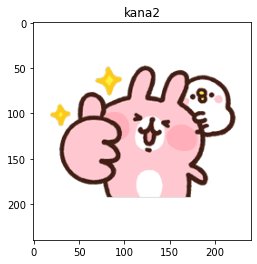

In [10]:
print('Filename: ', data_name.iloc[1, 0])
print('Name: ', data_name.iloc[1, 1])

img_filename = data_name.iloc[1, 0]
img_path = os.path.join(img_root, img_filename)

image = Image.open(img_path)
plt.imshow(image)
plt.title(data_name.iloc[1, 1])
plt.show()



In [11]:
class KanaDataset(Dataset):
    def __init__(self, img_dir, csv_file, transform=None):
        self.img_dir = img_dir
        self.csv_path = os.path.join(img_dir, csv_file)
        self.data_name = pd.read_csv(self.csv_path)
        self.len = self.data_name.shape[0]
        self.transform = transform
        
    def len(self):
        return self.len
    
    def __getitem__(self, index):
        img_name = os.path.join(self.img_dir, self.data_name.iloc[index, 0])
        image = Image.open(img_name)
        
        y = self.data_name.iloc[index, 1]
        
        if self.transform:
            image = self.transform(image)
            
        return image, y


In [12]:
img_dir = 'C:\\Users\\chengyu\\Desktop\\jupyter_workspace\\Pytorch\\000_Basic\\resource\\img'
csv_file = 'index.csv'


my_kana_dataset = KanaDataset(img_dir=img_dir, csv_file=csv_file)

print(my_kana_dataset[1])

(<PIL.PngImagePlugin.PngImageFile image mode=P size=240x240 at 0x1F129DC0>, 'kana2')


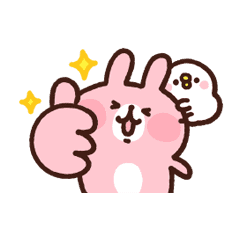

In [13]:
my_kana_dataset[1][0]

In [14]:
my_kana_dataset[1][1]

'kana2'

## Torch Vision Transform

In [15]:
import torchvision.transforms as transforms

crop_to_tensor_trans = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])

my_kana_dataset_trans = KanaDataset(img_dir=img_dir, csv_file=csv_file, transform=crop_to_tensor_trans)

print(my_kana_dataset[1])



(<PIL.PngImagePlugin.PngImageFile image mode=P size=240x240 at 0x1E11DF40>, 'kana2')


In [16]:
my_kana_dataset_trans[1][0].shape

torch.Size([1, 20, 20])

## Torchvision Dataset

In [17]:
import torchvision.datasets as dsets

mnist_root_dir = 'C:\\Users\\chengyu\\Desktop\\jupyter_workspace\\Pytorch\\000_Basic\\resource\\img\\mnist'
my_torch_dataset = dsets.MNIST(root=mnist_root_dir, train=False, download=True, transform=transforms.ToTensor())


In [18]:
my_torch_dataset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,